TASK(2)
Titanic Classification

About Dataset
The Titanic Survival dataset is a widely-used dataset in the field of machine learning and data analysis. It contains information about the passengers on board the RMS Titanic, including whether they survived the shipwreck or not. Here is a description of the typical fields you may find in the Titanic Survival dataset:

Passenger Information:
This section includes data about the passengers, such as their names, gender, age, and passenger class (First, Second, or Third Class). This information provides insights into the demographics of the passengers on board.

Survival Status:
The survival status field indicates whether a passenger survived the Titanic disaster or not. This binary variable is typically represented as 1 (survived) or 0 (did not survive). This field serves as the target variable for prediction models.

Other Relevant Factors:
Additional fields may be included to capture any other relevant factors that could potentially affect survival rates. These may include variables such as passenger ID, lifeboat numbers (if applicable), and any special circumstances related to the passenger's survival.

The Titanic Survival dataset is often used as a training dataset for classification and predictive modeling tasks. Researchers and data scientists use this dataset to explore patterns and factors that influenced the survival rates of passengers on the Titanic. By analyzing this dataset, one can gain insights into the demographics, socio-economic factors, and strategies for survival during the shipwreck

Titanic Survival Datasets

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load dataset
df = pd.read_csv('titanic survival.csv')

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df['Age'].isnull().sum()

86

In [8]:
# Unique values in categorical columns
print(df['Sex'].unique())

['male' 'female']


In [9]:
# Display the last few columns of database
print(df.tail())

     PassengerId  Survived  Pclass                          Name     Sex  \
413         1305         0       3            Spector, Mr. Woolf    male   
414         1306         1       1  Oliva y Ocana, Dona. Fermina  female   
415         1307         0       3  Saether, Mr. Simon Sivertsen    male   
416         1308         0       3           Ware, Mr. Frederick    male   
417         1309         0       3      Peter, Master. Michael J    male   

      Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
413   NaN      0      0           A.5. 3236    8.0500   NaN        S  
414  39.0      0      0            PC 17758  108.9000  C105        C  
415  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416   NaN      0      0              359309    8.0500   NaN        S  
417   NaN      1      1                2668   22.3583   NaN        C  


<Axes: >

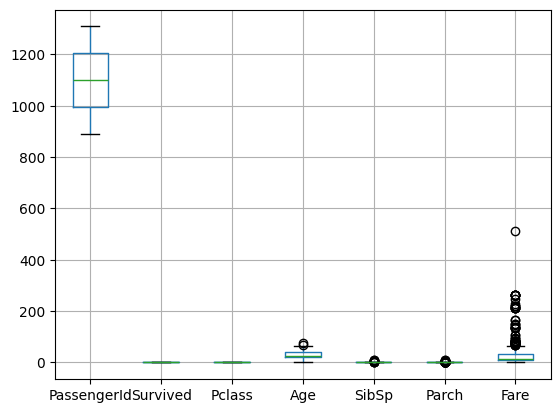

In [10]:
df.boxplot()

In [11]:
df.hist()

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

In [12]:
#Survival analysis 
survival_rate = df['Survived'].count()
print(survival_rate)

418


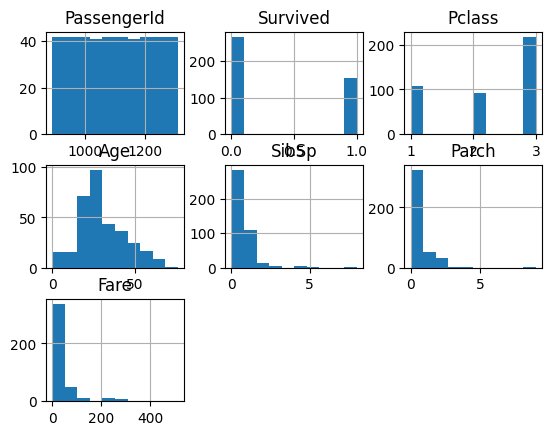

Pclass
1    107
2     93
3    218
Name: Survived, dtype: int64


In [13]:
# Survival rate by passenger class
survival_by_class = df.groupby('Pclass')['Survived'].count()
survival_by_class.plot(kind='bar',color='green',edgecolor='black')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()
print(survival_by_class)

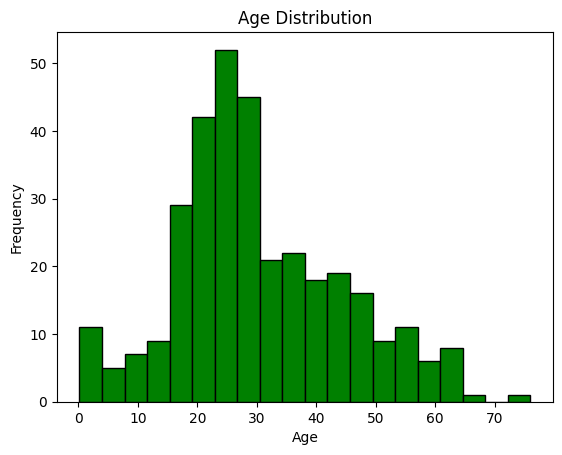

In [14]:
# Age Distribution 
plt.hist(df['Age'],bins=20,color='green',edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

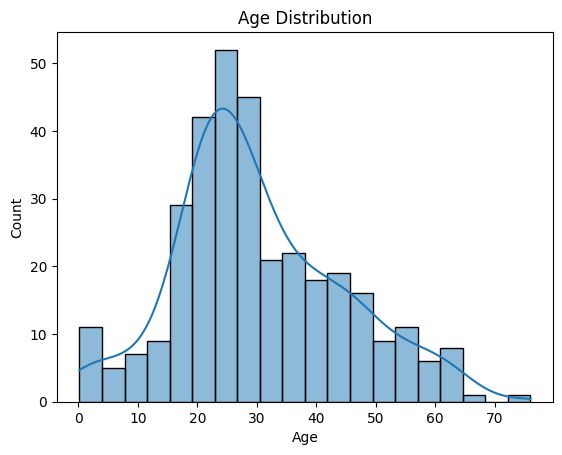

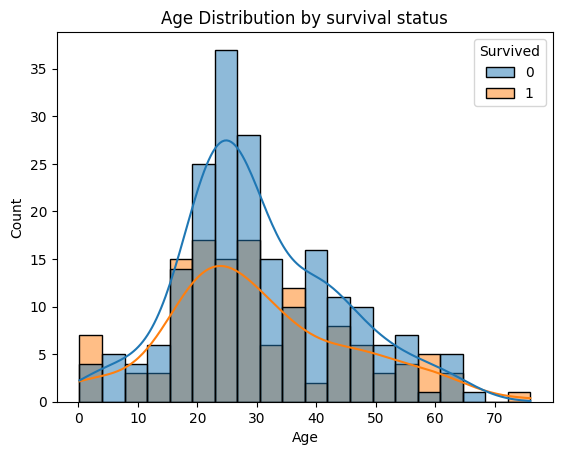

In [15]:
# Age Distribution
sns.histplot(df['Age'].dropna(),bins=20,kde=True)
plt.title('Age Distribution')
plt.show()

# Age distrubution by survival status
sns.histplot(x='Age',hue='Survived',data=df,bins=20,kde=True)
plt.title('Age Distribution by survival status')
plt.show()

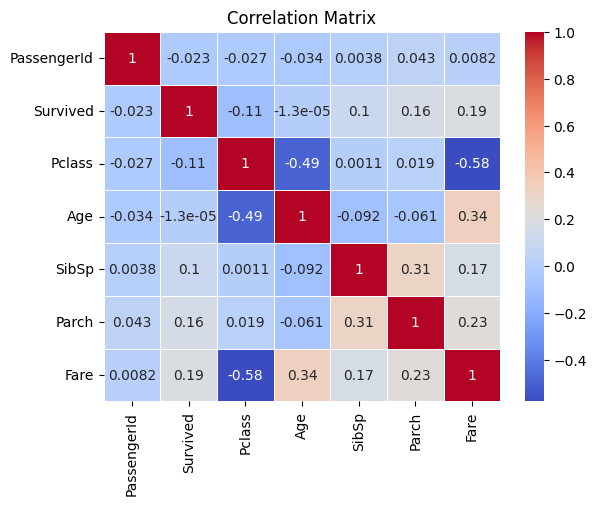

In [16]:
# Select numeric columns only 
numeric_columns = df.select_dtypes(include=['float64','int64']).columns

# Correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

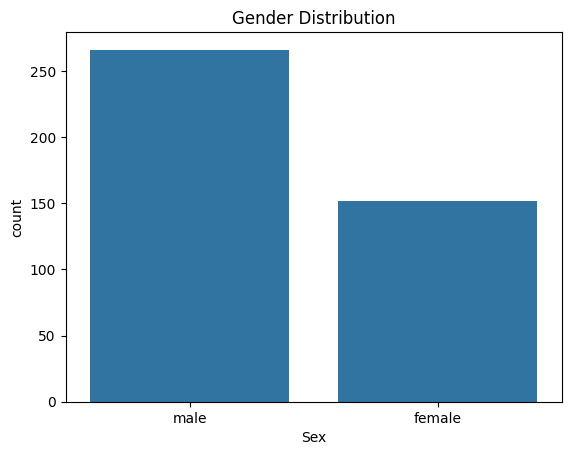

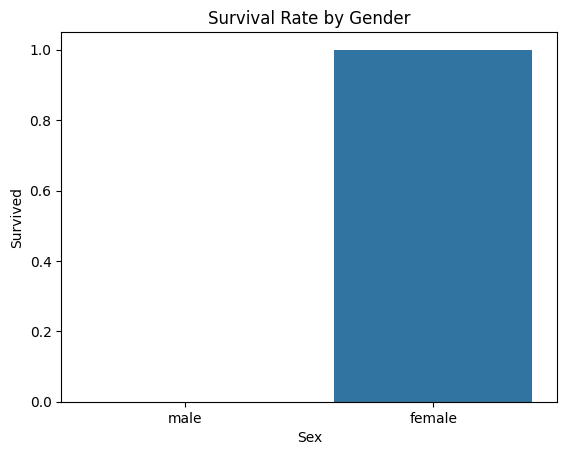

In [17]:

# Gender distribution 
sns.countplot(x='Sex',data=df)
plt.title('Gender Distribution')
plt.show()

# Survival rate by gender 
sns.barplot(x='Sex',y='Survived',data=df)
plt.title('Survival Rate by Gender')
plt.show()